In [1]:
import pandas as pd
data = pd.read_csv('data\\den_a_tochka.csv', encoding = 'cp1251', sep=';')

In [2]:
for col in data.columns:
    res = round(data[col].isnull().sum()/data.shape[0] * 100)
    print(col, ' '*(25-len(col)), res, ' % пропусков      ', data[col].dtype)

Наименование работ         0  % пропусков       object
Unnamed: 1                 29  % пропусков       object
Unnamed: 2                 56  % пропусков       object
Unnamed: 3                 29  % пропусков       object
Unnamed: 4                 56  % пропусков       object
Unnamed: 5                 29  % пропусков       object
Unnamed: 6                 100  % пропусков       float64
Unnamed: 7                 100  % пропусков       float64
Unnamed: 8                 100  % пропусков       float64
Unnamed: 9                 100  % пропусков       float64
Unnamed: 10                100  % пропусков       float64
Unnamed: 11                100  % пропусков       float64
Unnamed: 12                100  % пропусков       float64
Объемработ(н/час)          99  % пропусков       object
Unnamed: 14                100  % пропусков       float64
Unnamed: 15                100  % пропусков       float64
Unnamed: 16                100  % пропусков       float64
КТУ                        10

In [3]:
list1 = []
list2 = []
for val in data['Наименование работ'].to_list():
    if 'Заказ' in val:
        list1.append(val)   
for i, val in enumerate(data['Наименование работ'].to_list()):
    if 'Итого' in val:
        for col in data.columns:
            if 'Итого' not in str(data[col].iloc[i]) and data[col].iloc[i] == data[col].iloc[i]:
                list2.append(data[col].iloc[i])
                break
del data

In [4]:

for i, elem in enumerate(list2):
    if type(elem) is str: list2[i] = (elem.replace('\xa0', ''))

for i, elem in enumerate(list2):
    if type(elem) is str: list2[i] = (elem.split(',')[0])
    
for i, elem in enumerate(list2):
    if elem != elem: print(i) # list2[i] = 0

for i, elem in enumerate(list2):
    list2[i] = int(elem)

In [5]:
list2.pop()

3050929

In [6]:
df = pd.DataFrame(list(zip(list1, list2)), columns=['Zakaz', 'Itog'])

In [7]:
df['Itog'] = df['Itog'] * 0.6

In [8]:
df['date'] = pd.to_datetime(df['Zakaz'].apply(lambda x: x[x.find('от')+3:x.find(',')]), dayfirst=True)

In [9]:
df['YM'] = df['date'].dt.to_period('M')

<AxesSubplot: title={'center': 'ЗП по месяцам'}, xlabel='YM'>

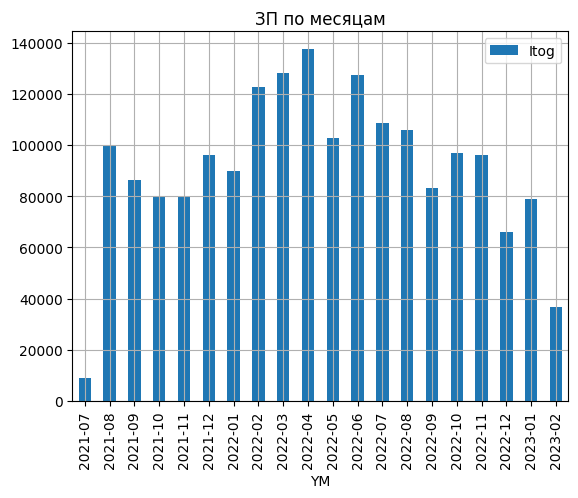

In [10]:
df[['YM', 'Itog']].groupby('YM').sum().plot.bar(grid=True, title='ЗП по месяцам')

In [11]:
df['Beznal'] = df['Zakaz'].apply(lambda x: ('VESTA' in x) or ('Logan' in x) or ('Веста' in x) or ('LOGAN' in x))

C:\Users\Денис\AppData\Local\Temp\ipykernel_15016\3761997445.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['Beznal', 'YM']).sum().groupby('Beznal').mean().plot.bar(grid=True, title='В среднем за месяц нал/безнал')


<AxesSubplot: title={'center': 'В среднем за месяц нал/безнал'}, xlabel='Beznal'>

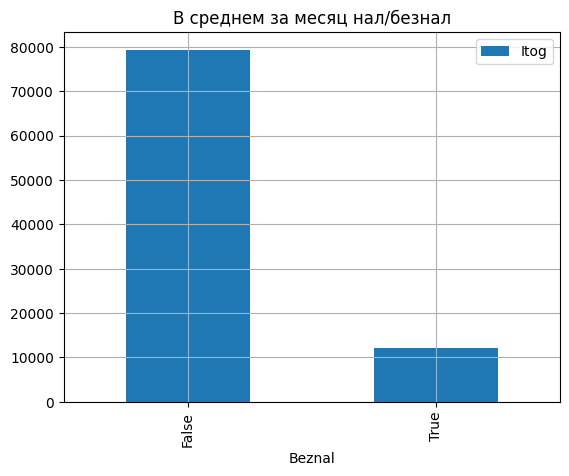

In [12]:
df.groupby(['Beznal', 'YM']).sum().groupby('Beznal').mean().plot.bar(grid=True, title='В среднем за месяц нал/безнал')